## Multiclass classification using pipeline

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets         import fetch_lfw_people
from sklearn.svm              import SVC
from sklearn.decomposition    import PCA
from sklearn.pipeline         import make_pipeline
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import classification_report
from sklearn.metrics          import confusion_matrix

### Load Data

In [2]:
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


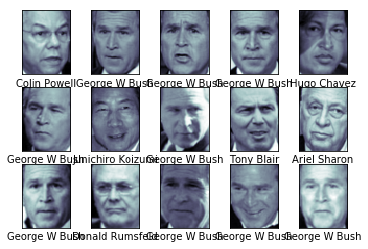

In [3]:
# plot subset
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

### Build pipeline

In [4]:
pca   = PCA(n_components = 150, svd_solver = 'randomized', random_state = 42)
svc   = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [5]:
# optimize two parameter relative to support vector classification
param_grid = {'svc__C'    : [1, 5, 10, 50], 
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, 
                    param_grid, 
                    cv     = 5, 
                    n_jobs = -1,
                    scoring = 'accuracy',
                    iid    = False)

In [6]:
# fit optimized model
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.0001}


### Model validation

In [9]:
# get best estimation
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [13]:
print(classification_report(ytest, yfit,  target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.00      0.00      0.00        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.37      1.00      0.54       126
Gerhard Schroeder       0.00      0.00      0.00        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       0.00      0.00      0.00        12
       Tony Blair       0.00      0.00      0.00        42

        micro avg       0.37      0.37      0.37       337
        macro avg       0.05      0.12      0.07       337
     weighted avg       0.14      0.37      0.20       337



C:\Users\giann\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\giann\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\giann\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


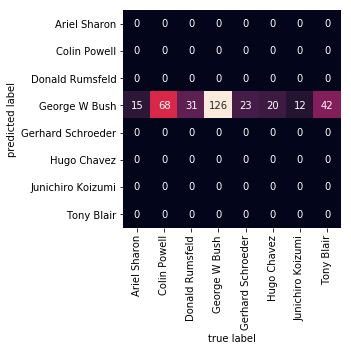

In [14]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

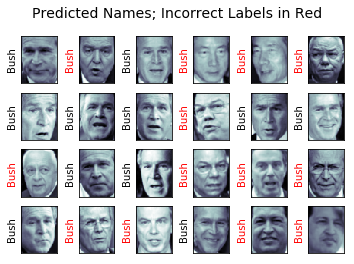

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);